         Timestamp     RMS  ASL  THR  ABS_ENERGY
0         0.049944  0.0004   16   40      79.218
1         0.099944  0.0004   16   40     118.120
2         0.149944  0.0006   18   40     270.920
3         0.199944  0.0006   19   40     260.274
4         0.249944  0.0006   18   40      99.862
...            ...     ...  ...  ...         ...
20026  1076.599944  0.0004   16   40      99.259
20027  1076.649944  0.0004   16   40      87.245
20028  1076.699944  0.0004   16   40     108.127
20029  1076.749944  0.0004   16   40     105.493
20030  1076.799944  0.0004   16   40     106.499

[20031 rows x 5 columns]


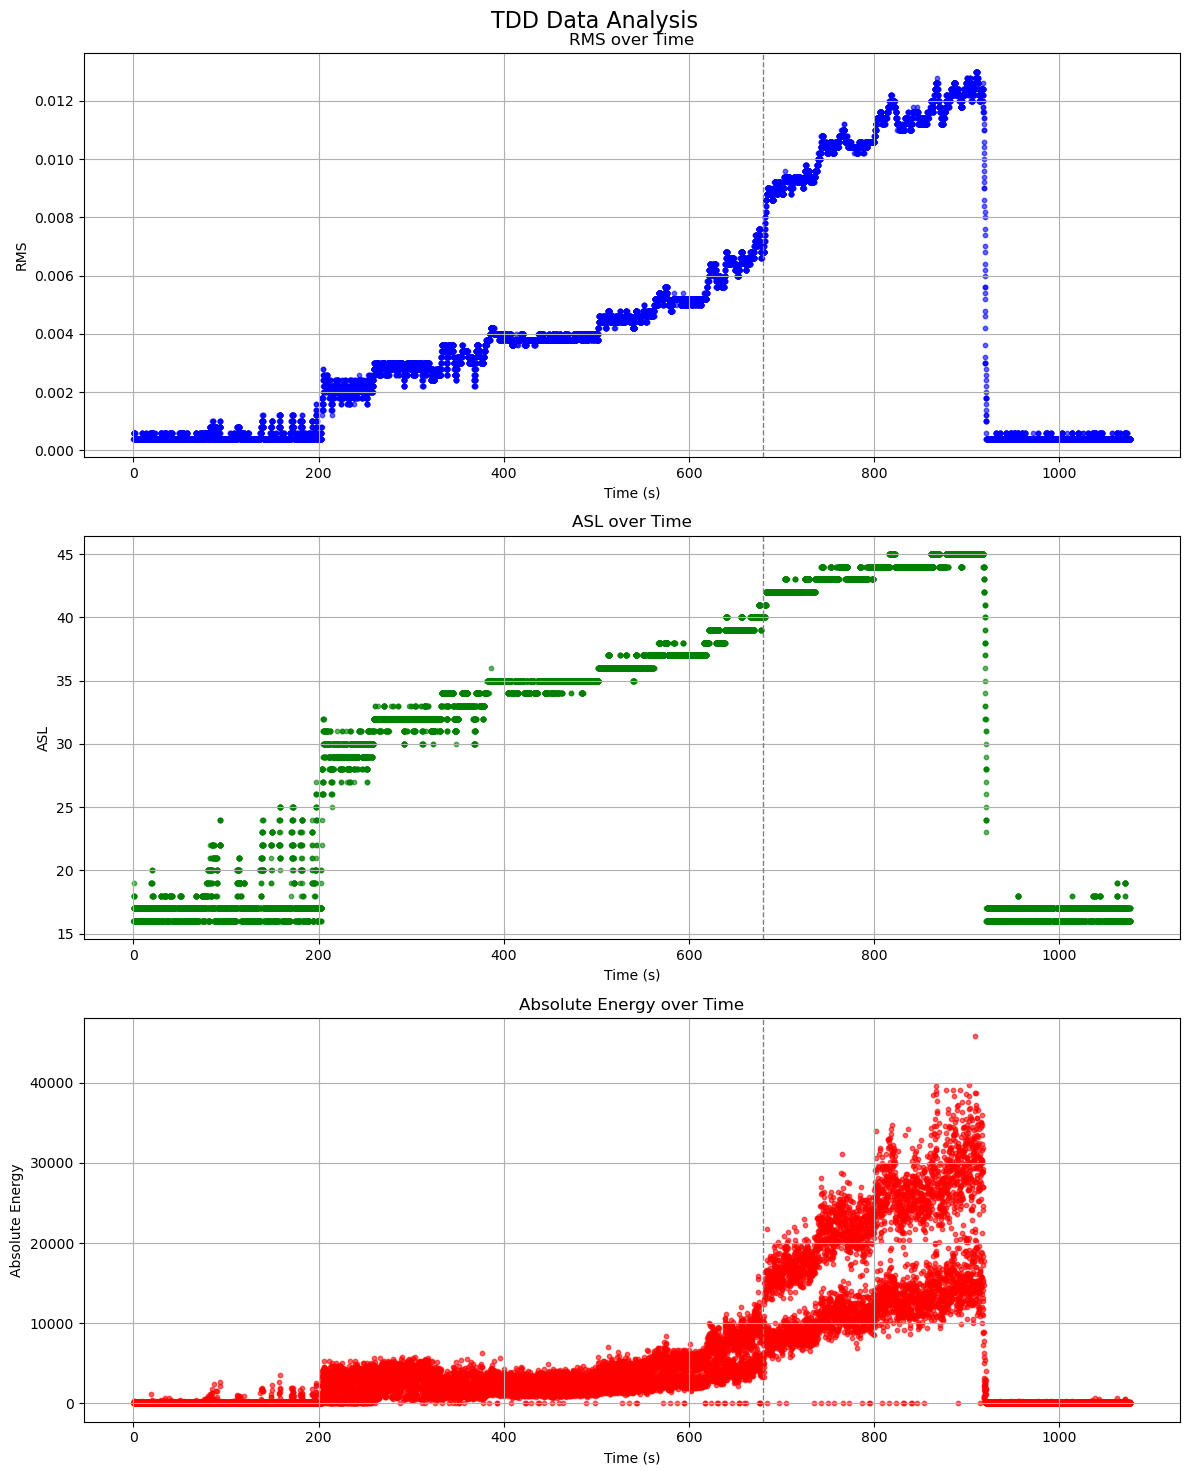

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def parse_tdd_data(file_path):
    # Initialize lists to store data
    timestamps = []
    rms = []
    asl = []
    thr = []
    abs_energy = []
    
    # Open and read the file
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('  2 '):
                # Extract timestamp
                timestamp = float(line.split()[-1])
                timestamps.append(timestamp)
                
                # Read the next two lines
                _ = next(file)  # Skip the "CH:[    RMS ASL THR  ABS-ENERGY]" line
                channel_data = next(file).strip()
                
                # Extract channel data
                data = channel_data.split('[')[-1].split(']')[0].split()
                rms.append(float(data[0]))
                asl.append(int(data[1]))
                thr.append(int(data[2]))
                abs_energy.append(float(data[3]))
    
    # Create DataFrame
    df = pd.DataFrame({
        'Timestamp': timestamps,
        'RMS': rms,
        'ASL': asl,
        'THR': thr,
        'ABS_ENERGY': abs_energy
    })
    
    return df


# def plot_tdd_data(df):
#     # Create a figure with 3 subplots
#     fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
#     fig.suptitle('TDD Data Analysis', fontsize=16)

#     # Plot RMS
#     ax1.plot(df['Timestamp'], df['RMS'], color='blue')
#     ax1.set_title('RMS over Time')
#     ax1.set_xlabel('Time (s)')
#     ax1.set_ylabel('RMS')
#     ax1.grid(True)

#     # Plot ASL
#     ax2.plot(df['Timestamp'], df['ASL'], color='green')
#     ax2.set_title('ASL over Time')
#     ax2.set_xlabel('Time (s)')
#     ax2.set_ylabel('ASL')
#     ax2.grid(True)

#     # Plot ABS_ENERGY
#     ax3.plot(df['Timestamp'], df['ABS_ENERGY'], color='red')
#     ax3.set_title('Absolute Energy over Time')
#     ax3.set_xlabel('Time (s)')
#     ax3.set_ylabel('Absolute Energy')
#     ax3.grid(True)

#     # Adjust layout and display plot
#     plt.tight_layout()
#     plt.show()


def plot_tdd_data(df, x_line=None):
    # Create a figure with 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle('TDD Data Analysis', fontsize=16)

    # Plot RMS
    ax1.scatter(df['Timestamp'], df['RMS'], color='blue', alpha=0.6, s=10)
    ax1.set_title('RMS over Time')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('RMS')
    ax1.grid(True)

    # Plot ASL
    ax2.scatter(df['Timestamp'], df['ASL'], color='green', alpha=0.6, s=10)
    ax2.set_title('ASL over Time')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('ASL')
    ax2.grid(True)

    # Plot ABS_ENERGY
    ax3.scatter(df['Timestamp'], df['ABS_ENERGY'], color='red', alpha=0.6, s=10)
    ax3.set_title('Absolute Energy over Time')
    ax3.set_xlabel('Time (s)')
    ax3.set_ylabel('Absolute Energy')
    ax3.grid(True)

    # Optionally add a vertical line if x_line is specified
    if x_line is not None:
        for ax in [ax1, ax2, ax3]:
            ax.axvline(x=x_line, color='gray', linestyle='--', linewidth=1)

    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()


# Example usage:
time_driven_data_filepath = r"\\10.1.91.208\Files\Stephen\FL Tests\FL-43\FL-43_continuous.txt"
df = parse_tdd_data(time_driven_data_filepath)
print(df)
plot_tdd_data(df, x_line=680)